In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("data1.csv", encoding= 'unicode_escape')

In [3]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail

<bound method NDFrame.tail of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.shape

(541909, 8)

In [11]:
df.duplicated().sum()

5268

In [12]:
df.dropna(subset=['CustomerID'],axis=0,inplace=True)
df.shape

(406829, 8)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.drop_duplicates(subset=None, keep=False, inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df['InvoiceNo'].value_counts()
df['StockCode'].value_counts()
df['Description'].value_counts()
df['InvoiceDate'].value_counts()
df['UnitPrice'].value_counts()
df['CustomerID'].value_counts()
df['Country'].value_counts()

United Kingdom          351964
Germany                   9465
France                    8459
EIRE                      7465
Spain                     2523
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1463
Australia                 1257
Norway                    1086
Italy                      803
Channel Islands            756
Finland                    695
Cyprus                     601
Sweden                     460
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     244
Unspecified                238
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

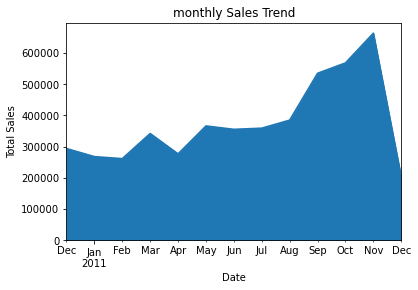

In [17]:
import matplotlib.pyplot as plt

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

monthly_sales=df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Quantity'].sum()

monthly_sales.plot(kind='area', stacked=True)

plt.title('monthly Sales Trend')

plt.xlabel('Date')

plt.ylabel('Total Sales')

plt.show()

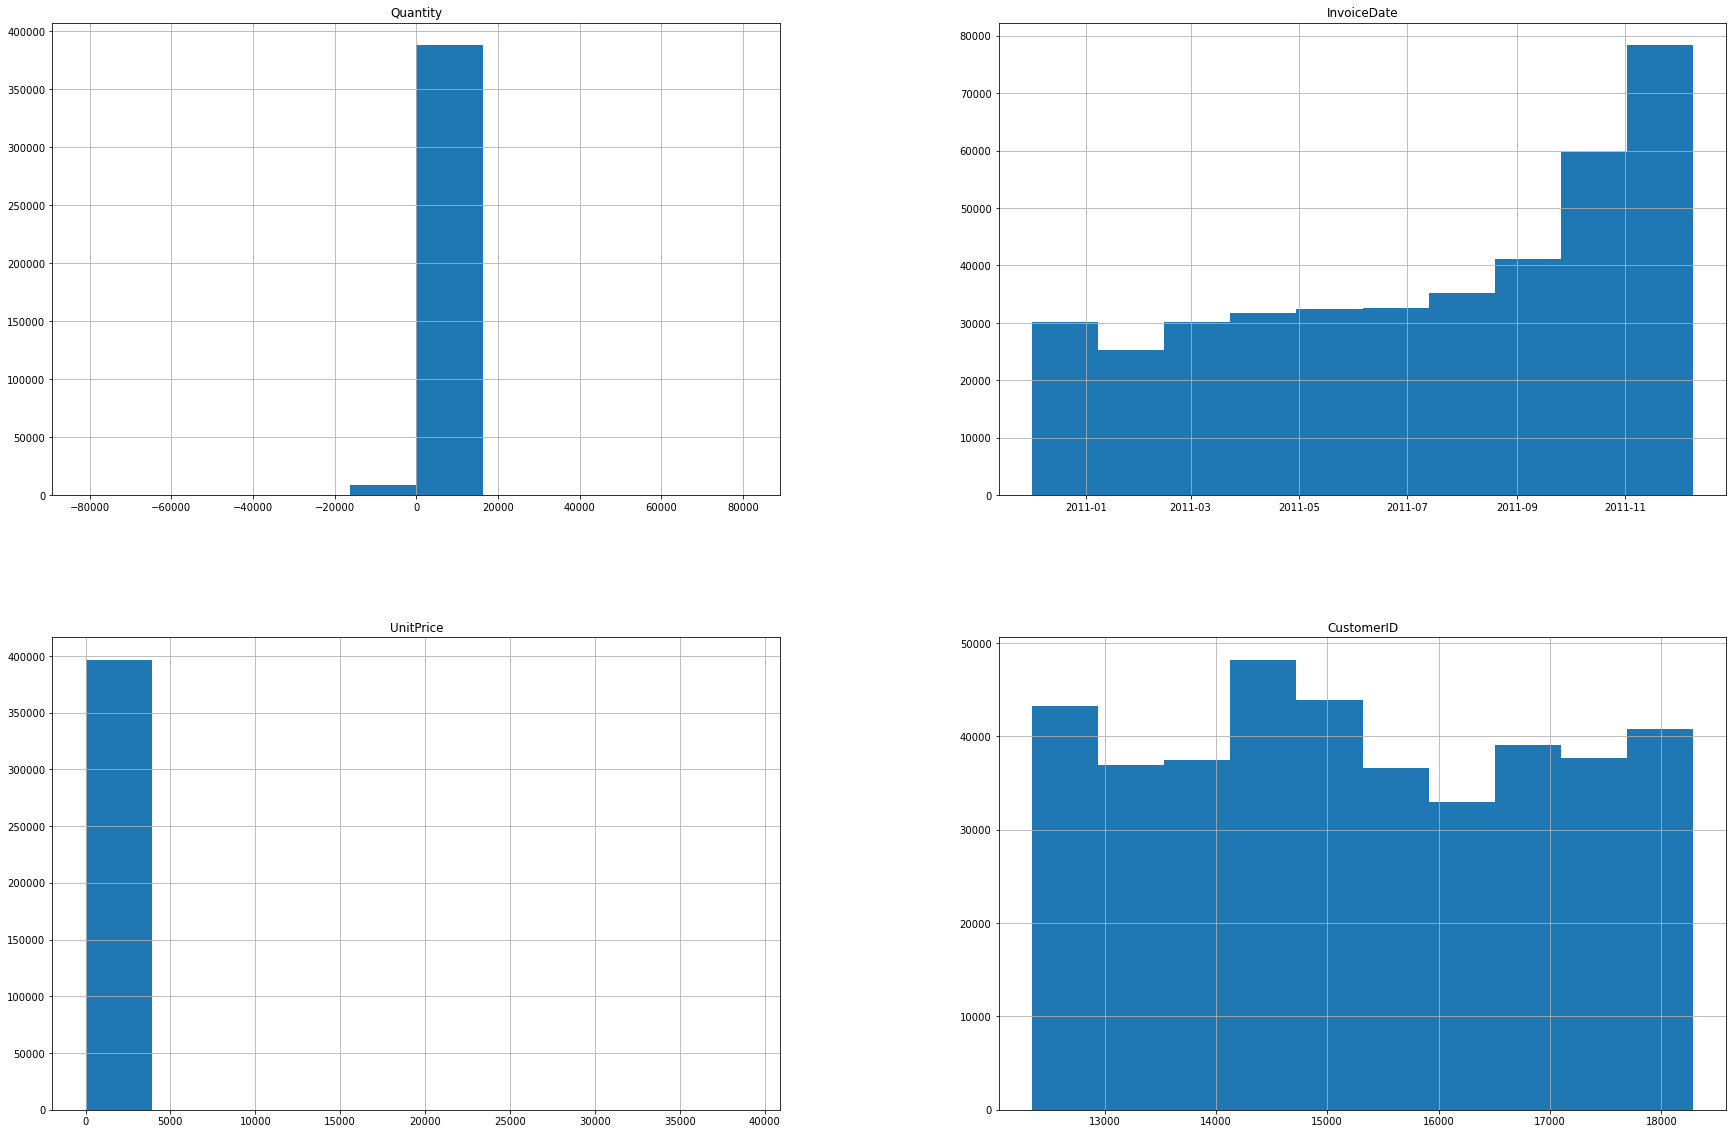

In [18]:
df.hist(figsize=(30,20))
plt.show()

<AxesSubplot:>

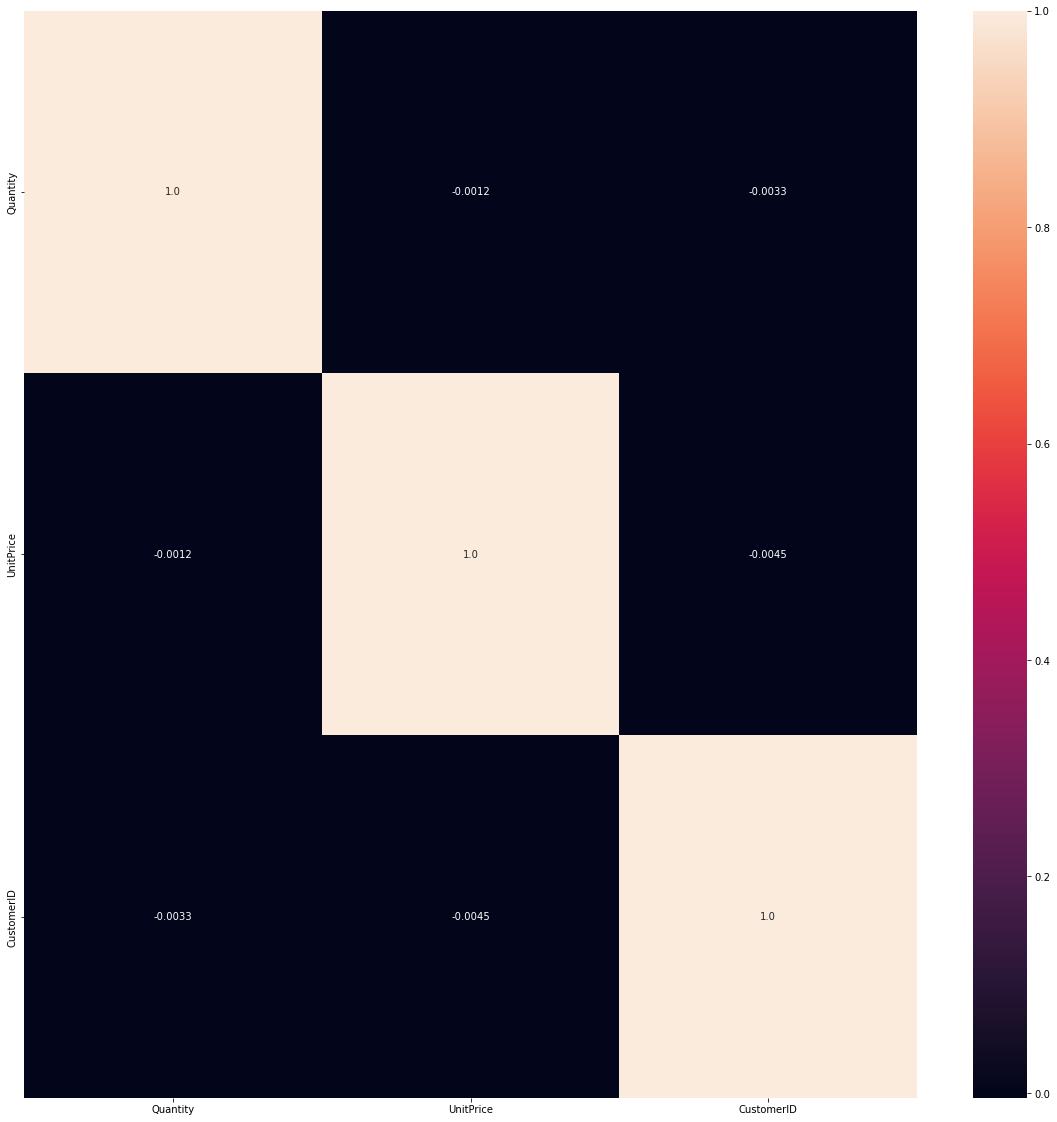

In [19]:
import seaborn as sns

plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True, fmt=".2")

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['InvoiceNo'] = encoder.fit_transform(df['InvoiceNo'])

InvoiceNo  = {index : label for index, label in enumerate(encoder.classes_)}

InvoiceNo 

{0: '536365',
 1: '536366',
 2: '536367',
 3: '536368',
 4: '536369',
 5: '536370',
 6: '536371',
 7: '536372',
 8: '536373',
 9: '536374',
 10: '536375',
 11: '536376',
 12: '536377',
 13: '536378',
 14: '536380',
 15: '536381',
 16: '536382',
 17: '536384',
 18: '536385',
 19: '536386',
 20: '536387',
 21: '536388',
 22: '536389',
 23: '536390',
 24: '536392',
 25: '536393',
 26: '536394',
 27: '536395',
 28: '536396',
 29: '536397',
 30: '536398',
 31: '536399',
 32: '536400',
 33: '536401',
 34: '536402',
 35: '536403',
 36: '536404',
 37: '536405',
 38: '536406',
 39: '536407',
 40: '536408',
 41: '536409',
 42: '536412',
 43: '536415',
 44: '536416',
 45: '536420',
 46: '536423',
 47: '536425',
 48: '536437',
 49: '536446',
 50: '536460',
 51: '536463',
 52: '536464',
 53: '536466',
 54: '536477',
 55: '536488',
 56: '536500',
 57: '536502',
 58: '536508',
 59: '536514',
 60: '536520',
 61: '536521',
 62: '536522',
 63: '536523',
 64: '536524',
 65: '536525',
 66: '536526',
 67: 

In [21]:
df['StockCode'] = encoder.fit_transform(df['StockCode'])

StockCode  = {index : label for index, label in enumerate(encoder.classes_)}

StockCode 

{0: '10002',
 1: '10080',
 2: '10120',
 3: '10123C',
 4: '10124A',
 5: '10124G',
 6: '10125',
 7: '10133',
 8: '10135',
 9: '11001',
 10: '15030',
 11: '15034',
 12: '15036',
 13: '15039',
 14: '15044A',
 15: '15044B',
 16: '15044C',
 17: '15044D',
 18: '15056BL',
 19: '15056N',
 20: '15056P',
 21: '15058A',
 22: '15058B',
 23: '15058C',
 24: '15060B',
 25: '16008',
 26: '16010',
 27: '16011',
 28: '16012',
 29: '16014',
 30: '16015',
 31: '16016',
 32: '16020C',
 33: '16033',
 34: '16043',
 35: '16045',
 36: '16046',
 37: '16048',
 38: '16049',
 39: '16052',
 40: '16054',
 41: '16151A',
 42: '16156L',
 43: '16156S',
 44: '16161G',
 45: '16161M',
 46: '16161P',
 47: '16161U',
 48: '16162L',
 49: '16162M',
 50: '16168M',
 51: '16169E',
 52: '16169K',
 53: '16169M',
 54: '16169N',
 55: '16169P',
 56: '16202A',
 57: '16202B',
 58: '16202E',
 59: '16206B',
 60: '16207A',
 61: '16207B',
 62: '16216',
 63: '16218',
 64: '16219',
 65: '16225',
 66: '16235',
 67: '16236',
 68: '16237',
 69: '1

In [22]:
df['Description'] = encoder.fit_transform(df['Description'])

Description  = {index : label for index, label in enumerate(encoder.classes_)}

Description 

{0: ' 4 PURPLE FLOCK DINNER CANDLES',
 1: " 50'S CHRISTMAS GIFT BAG LARGE",
 2: ' DOLLY GIRL BEAKER',
 3: ' I LOVE LONDON MINI BACKPACK',
 4: ' I LOVE LONDON MINI RUCKSACK',
 5: ' NINE DRAWER OFFICE TIDY',
 6: ' OVAL WALL MIRROR DIAMANTE ',
 7: ' RED SPOT GIFT BAG LARGE',
 8: ' SET 2 TEA TOWELS I LOVE LONDON ',
 9: ' SPACEBOY BABY GIFT SET',
 10: ' TOADSTOOL BEDSIDE LIGHT ',
 11: ' TRELLIS COAT RACK',
 12: '10 COLOUR SPACEBOY PEN',
 13: '12 COLOURED PARTY BALLOONS',
 14: '12 DAISY PEGS IN WOOD BOX',
 15: '12 EGG HOUSE PAINTED WOOD',
 16: '12 HANGING EGGS HAND PAINTED',
 17: '12 IVORY ROSE PEG PLACE SETTINGS',
 18: '12 MESSAGE CARDS WITH ENVELOPES',
 19: '12 PENCIL SMALL TUBE WOODLAND',
 20: '12 PENCILS SMALL TUBE RED RETROSPOT',
 21: '12 PENCILS SMALL TUBE SKULL',
 22: '12 PENCILS TALL TUBE POSY',
 23: '12 PENCILS TALL TUBE RED RETROSPOT',
 24: '12 PENCILS TALL TUBE SKULLS',
 25: '12 PENCILS TALL TUBE WOODLAND',
 26: '12 PINK HEN+CHICKS IN BASKET',
 27: '12 PINK ROSE PEG PLACE SETTINGS

In [23]:
df['InvoiceDate'] = encoder.fit_transform(df['InvoiceDate'])

InvoiceDate  = {index : label for index, label in enumerate(encoder.classes_)}

InvoiceDate

{0: numpy.datetime64('2010-12-01T08:26:00.000000000'),
 1: numpy.datetime64('2010-12-01T08:28:00.000000000'),
 2: numpy.datetime64('2010-12-01T08:34:00.000000000'),
 3: numpy.datetime64('2010-12-01T08:35:00.000000000'),
 4: numpy.datetime64('2010-12-01T08:45:00.000000000'),
 5: numpy.datetime64('2010-12-01T09:00:00.000000000'),
 6: numpy.datetime64('2010-12-01T09:01:00.000000000'),
 7: numpy.datetime64('2010-12-01T09:02:00.000000000'),
 8: numpy.datetime64('2010-12-01T09:09:00.000000000'),
 9: numpy.datetime64('2010-12-01T09:32:00.000000000'),
 10: numpy.datetime64('2010-12-01T09:34:00.000000000'),
 11: numpy.datetime64('2010-12-01T09:37:00.000000000'),
 12: numpy.datetime64('2010-12-01T09:41:00.000000000'),
 13: numpy.datetime64('2010-12-01T09:45:00.000000000'),
 14: numpy.datetime64('2010-12-01T09:49:00.000000000'),
 15: numpy.datetime64('2010-12-01T09:53:00.000000000'),
 16: numpy.datetime64('2010-12-01T09:56:00.000000000'),
 17: numpy.datetime64('2010-12-01T09:57:00.000000000'),
 1

In [24]:
df['Country'] = encoder.fit_transform(df['Country'])

Country  = {index : label for index, label in enumerate(encoder.classes_)}

Country

{0: 'Australia',
 1: 'Austria',
 2: 'Bahrain',
 3: 'Belgium',
 4: 'Brazil',
 5: 'Canada',
 6: 'Channel Islands',
 7: 'Cyprus',
 8: 'Czech Republic',
 9: 'Denmark',
 10: 'EIRE',
 11: 'European Community',
 12: 'Finland',
 13: 'France',
 14: 'Germany',
 15: 'Greece',
 16: 'Iceland',
 17: 'Israel',
 18: 'Italy',
 19: 'Japan',
 20: 'Lebanon',
 21: 'Lithuania',
 22: 'Malta',
 23: 'Netherlands',
 24: 'Norway',
 25: 'Poland',
 26: 'Portugal',
 27: 'RSA',
 28: 'Saudi Arabia',
 29: 'Singapore',
 30: 'Spain',
 31: 'Sweden',
 32: 'Switzerland',
 33: 'USA',
 34: 'United Arab Emirates',
 35: 'United Kingdom',
 36: 'Unspecified'}

In [25]:
df['CustomerID'] = encoder.fit_transform(df['CustomerID'])

CustomerID  = {index : label for index, label in enumerate(encoder.classes_)}

CustomerID

{0: 12346.0,
 1: 12347.0,
 2: 12348.0,
 3: 12349.0,
 4: 12350.0,
 5: 12352.0,
 6: 12353.0,
 7: 12354.0,
 8: 12355.0,
 9: 12356.0,
 10: 12357.0,
 11: 12358.0,
 12: 12359.0,
 13: 12360.0,
 14: 12361.0,
 15: 12362.0,
 16: 12363.0,
 17: 12364.0,
 18: 12365.0,
 19: 12367.0,
 20: 12370.0,
 21: 12371.0,
 22: 12372.0,
 23: 12373.0,
 24: 12374.0,
 25: 12375.0,
 26: 12377.0,
 27: 12378.0,
 28: 12379.0,
 29: 12380.0,
 30: 12381.0,
 31: 12383.0,
 32: 12384.0,
 33: 12386.0,
 34: 12388.0,
 35: 12390.0,
 36: 12391.0,
 37: 12393.0,
 38: 12394.0,
 39: 12395.0,
 40: 12397.0,
 41: 12398.0,
 42: 12399.0,
 43: 12401.0,
 44: 12402.0,
 45: 12403.0,
 46: 12405.0,
 47: 12406.0,
 48: 12407.0,
 49: 12408.0,
 50: 12409.0,
 51: 12410.0,
 52: 12412.0,
 53: 12413.0,
 54: 12414.0,
 55: 12415.0,
 56: 12417.0,
 57: 12418.0,
 58: 12420.0,
 59: 12421.0,
 60: 12422.0,
 61: 12423.0,
 62: 12424.0,
 63: 12425.0,
 64: 12426.0,
 65: 12427.0,
 66: 12428.0,
 67: 12429.0,
 68: 12430.0,
 69: 12431.0,
 70: 12432.0,
 71: 12433.0,
 7

In [26]:
y = df['Country'].values
X = df.drop(columns = ['Country','CustomerID'])

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.00000000e+00 8.82161282e-01 9.54043646e-01 5.00037039e-01
  0.00000000e+00 6.54349500e-05]
 [0.00000000e+00 7.19250611e-01 9.56097561e-01 5.00037039e-01
  0.00000000e+00 8.69899923e-05]
 [0.00000000e+00 7.75183275e-01 2.21052632e-01 5.00049386e-01
  0.00000000e+00 7.05671029e-05]
 [0.00000000e+00 7.61064350e-01 4.65468549e-01 5.00037039e-01
  0.00000000e+00 8.69899923e-05]
 [0.00000000e+00 7.60792832e-01 7.12708601e-01 5.00037039e-01
  0.00000000e+00 8.69899923e-05]
 [0.00000000e+00 4.35786044e-01 7.64313222e-01 5.00012346e-01
  0.00000000e+00 1.96304850e-04]
 [0.00000000e+00 2.04995927e-01 3.70731707e-01 5.00037039e-01
  0.00000000e+00 1.09058250e-04]
 [4.50775334e-05 4.04561499e-01 4.01026958e-01 5.00037039e-01
  4.88878025e-05 4.74724147e-05]
 [4.50775334e-05 4.04289981e-01 4.00256739e-01 5.00037039e-01
  4.88878025e-05 4.74724147e-05]
 [9.01550667e-05 8.33288080e-01 5.57124519e-02 5.00197543e-01
  9.77756050e-05 4.33666923e-05]]
y 
 [35 35 35 35 35 35 35 35 35 35]


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [30]:
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (396737, 6)
x_test shape is: (30, 6)
y_train shape is: (396737,)
y_test shape is: (30,)


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.8879081104106751
DecisionTreeClassifierModel Test Score is :  0.8
DecisionTreeClassifierModel Classes are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
DecisionTreeClassifierModel feature importances are :  [0.         0.38333296 0.         0.48878207 0.         0.12788496]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [35 35 35 35 35 35 35 35 35 35]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[1.70305728e-03 8.57401252e-04 4.69808905e-05 5.41454763e-03
  1.17452226e-04 3.40611456e-04 2.76012732e-03 2.46649675e-03
  0.00000000e+00 3.52356679e-04 2.17638975e-02 1.87923562e-04
  1.40942672e-03 1.58677958e-02 1.89332989e-02 3.64101902e-04
  3.99337569e-04 5.75515909e-04 2.71314643e-03 1.64433117e-04
  1.17452226e-04 0.00000000e+00 5.52025464e-04 1.38593627e-03
  2.56045853e-03 1.1157961

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = LogisticRegressionModel.predict(x_test)
y_pred_prob = LogisticRegressionModel.predict_proba(x_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

LogisticRegressionModel Train Score is :  0.8870864073681053
LogisticRegressionModel Test Score is :  0.8
LogisticRegressionModel Classes are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
LogisticRegressionModel No. of iteratios is :  [18]
----------------------------------------------------
Predicted Value for LogisticRegressionModel is :  [35 35 35 35 35 35 35 35 35 35]
Prediction Probabilities Value for LogisticRegressionModel is :  [[4.43031305e-03 7.93804549e-04 7.00282834e-05 5.45695150e-03
  1.45824397e-04 4.93878758e-04 2.21067339e-03 2.08790867e-03
  8.89143089e-05 7.84867494e-04 1.66363742e-02 2.14636420e-04
  2.07088144e-03 2.22178290e-02 2.65152190e-02 4.55426360e-04
  5.09867690e-04 5.65830707e-04 1.77773706e-03 1.59902540e-03
  2.28722580e-04 1.12447266e-04 1.99903040e-04 6.97258363e-03
  2.13922321e-03 1.07030003e-03 3.94630996e-03 4.71723844e-05
  3.88348377e-05 8.97194016e-04 7.52699292e-03 1.454278

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  24


In [37]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.8000000000000002


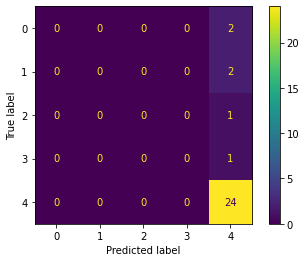

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

CM2 = confusion_matrix(y_test, y_pred)

CM2_display = ConfusionMatrixDisplay(CM2).plot()